In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, MinMaxScaler,
                                   PolynomialFeatures)
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('train.csv', sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.6,0.3,0.36,1.2,0.035,43,126,0.9909,3.01,0.63,11.4,6,white
1,7.7,0.5,0.26,1.9,0.062,9,31,0.9966,3.39,0.64,9.6,5,red
2,8.4,0.5,0.35,2.9,0.076,21,127,0.9976,3.23,0.63,9.2,5,red
3,7.5,0.4,0.33,5.0,0.045,30,131,0.9942,3.32,0.44,10.9,6,white
4,6.4,0.2,0.25,20.2,0.083,35,157,0.9998,3.17,0.50,9.1,5,white


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000,6714.000000
mean,7.251638,0.348436,0.317466,5.411871,0.057506,30.132559,114.576259,0.994789,3.219103,0.536120,10.458743,5.796098
std,1.330423,0.168505,0.148842,4.739180,0.038175,17.619884,56.417138,0.003020,0.160737,0.157877,1.189933,0.883490
min,3.800000,0.100000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987100,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.200000,0.240000,1.800000,0.038000,16.000000,75.000000,0.992400,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,3.000000,0.048000,28.000000,117.000000,0.995100,3.210000,0.510000,10.200000,6.000000
75%,7.700000,0.400000,0.390000,8.000000,0.068000,41.000000,155.000000,0.997100,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.300000,1.660000,65.800000,0.611000,289.000000,440.000000,1.039000,4.010000,2.000000,14.900000,9.000000


In [4]:
df['quality']

0       6
1       5
2       5
3       6
4       5
       ..
6709    5
6710    8
6711    7
6712    5
6713    5
Name: quality, Length: 6714, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 0 to 6713
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6714 non-null   float64
 1   volatile acidity      6714 non-null   float64
 2   citric acid           6714 non-null   float64
 3   residual sugar        6714 non-null   float64
 4   chlorides             6714 non-null   float64
 5   free sulfur dioxide   6714 non-null   int64  
 6   total sulfur dioxide  6714 non-null   int64  
 7   density               6714 non-null   float64
 8   pH                    6714 non-null   float64
 9   sulphates             6714 non-null   float64
 10  alcohol               6714 non-null   float64
 11  quality               6714 non-null   int64  
 12  type                  6714 non-null   object 
dtypes: float64(9), int64(3), object(1)
memory usage: 682.0+ KB


In [6]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['type'])
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 0 to 6713
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6714 non-null   float64
 1   volatile acidity      6714 non-null   float64
 2   citric acid           6714 non-null   float64
 3   residual sugar        6714 non-null   float64
 4   chlorides             6714 non-null   float64
 5   free sulfur dioxide   6714 non-null   int64  
 6   total sulfur dioxide  6714 non-null   int64  
 7   density               6714 non-null   float64
 8   pH                    6714 non-null   float64
 9   sulphates             6714 non-null   float64
 10  alcohol               6714 non-null   float64
 11  quality               6714 non-null   int64  
 12  type_red              6714 non-null   uint8  
 13  type_white            6714 non-null   uint8  
dtypes: float64(9), int64(3), uint8(2)
memory usage: 642.7 KB


In [7]:
y_col = "quality"

X = one_hot_encoded_data.drop(y_col, axis=1)
y = one_hot_encoded_data[y_col]

In [24]:
poly_features = PolynomialFeatures(degree = 5, include_bias = False)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(one_hot_encoded_data, y, test_size=0.3)
s = MinMaxScaler()
X_train_s = s.fit_transform(X_train)
X_test_s = s.fit_transform(X_test)
X_train_poly = poly_features.fit_transform(X_train_s)
X_test_poly = poly_features.fit_transform(X_test_s)


TypeError: 'tuple' object is not callable

In [42]:
lm = LinearRegression()
lm.fit(X_train_poly, y_train)


LinearRegression()

In [43]:
predicted = lm.predict(X_test_poly)
predicted

array([6.00000623, 5.00012058, 5.00002848, ..., 7.00000547, 6.00000225,
       6.99999397])

In [44]:
lm.score(X_train_poly, y_train)
lm.score(X_test_poly, y_test)

0.9999999926219113

In [45]:

mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
print(rmse)
print(mse)

7.701605606121539e-05
5.931472891224272e-09


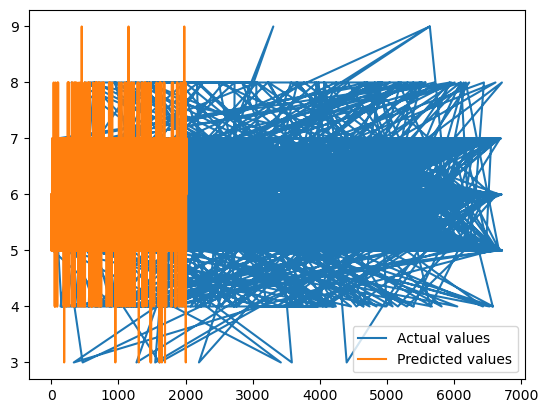

In [46]:
plt.plot(y_test, label = 'Actual values')
plt.plot(predicted, label = 'Predicted values')
plt.legend()
plt.show()